In [17]:
# =============================================================
# HR EMPLOYEE ATTRITION PROJECT - FULL NOTEBOOK
# Dataset: WA_Fn-UseC_-HR-Employee-Attrition.csv
# =============================================================

# ----------------------------------------
# 1. Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")


In [18]:
df = pd.read_csv(r"C:\Users\lenovo\python learn\Project py\Full Cap Project\Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [19]:
df.shape

(1470, 35)

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [24]:

df.isnull().sum()
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape

(1470, 35)

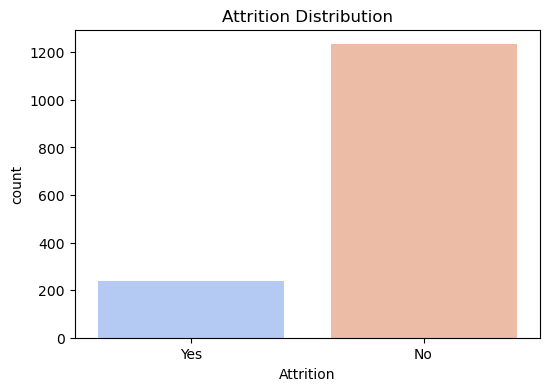

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette='coolwarm')
plt.title("Attrition Distribution")
plt.show()

df['Attrition'].value_counts(normalize=True)


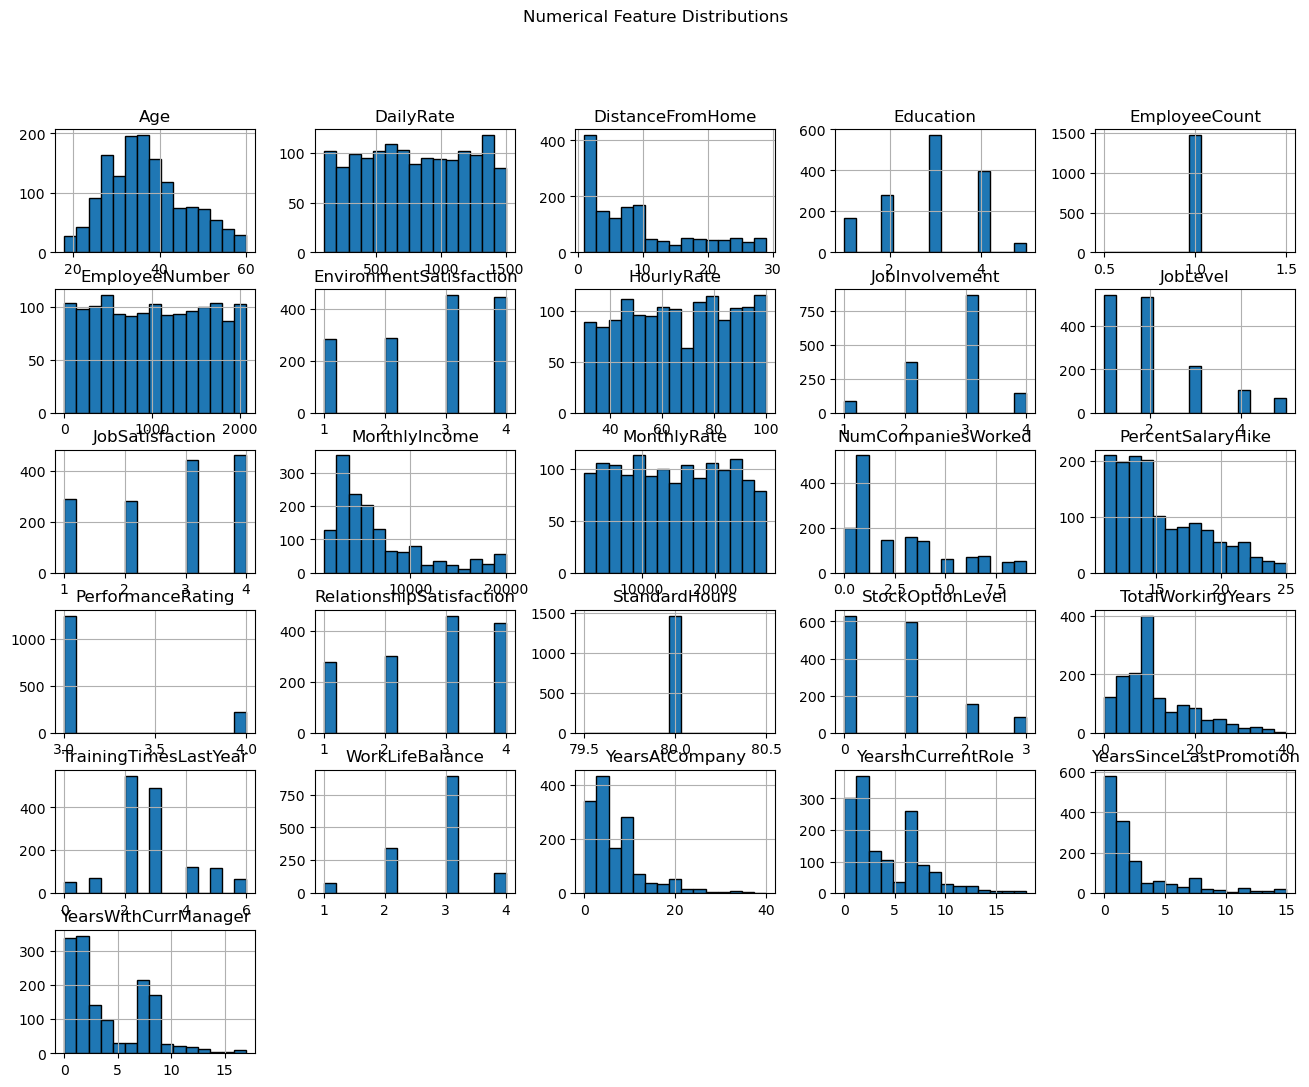

In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(16,12), bins=15, edgecolor='black')
plt.suptitle("Numerical Feature Distributions")
plt.show()


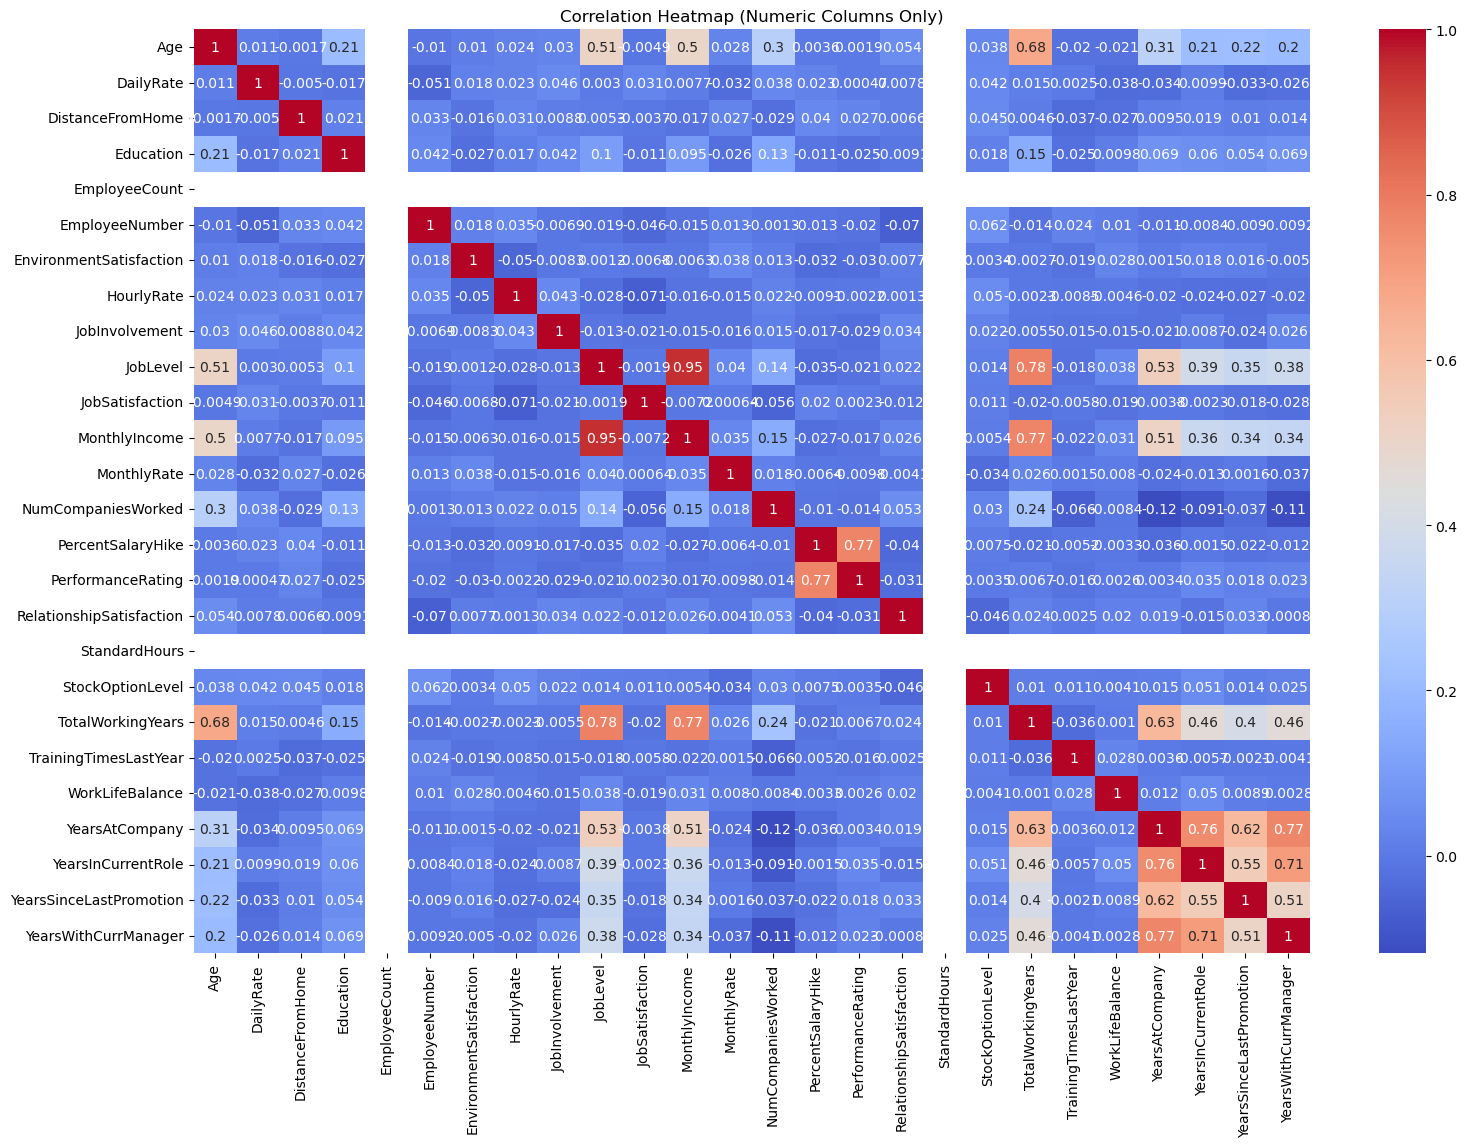

In [33]:
plt.figure(figsize=(18,12))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


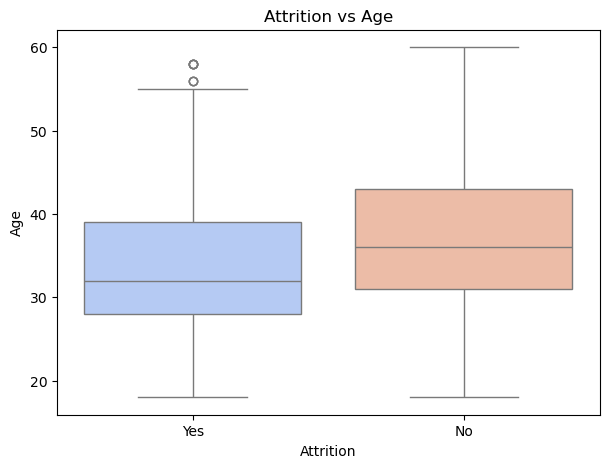

In [34]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Attrition', y='Age', palette='coolwarm')
plt.title("Attrition vs Age")
plt.show()


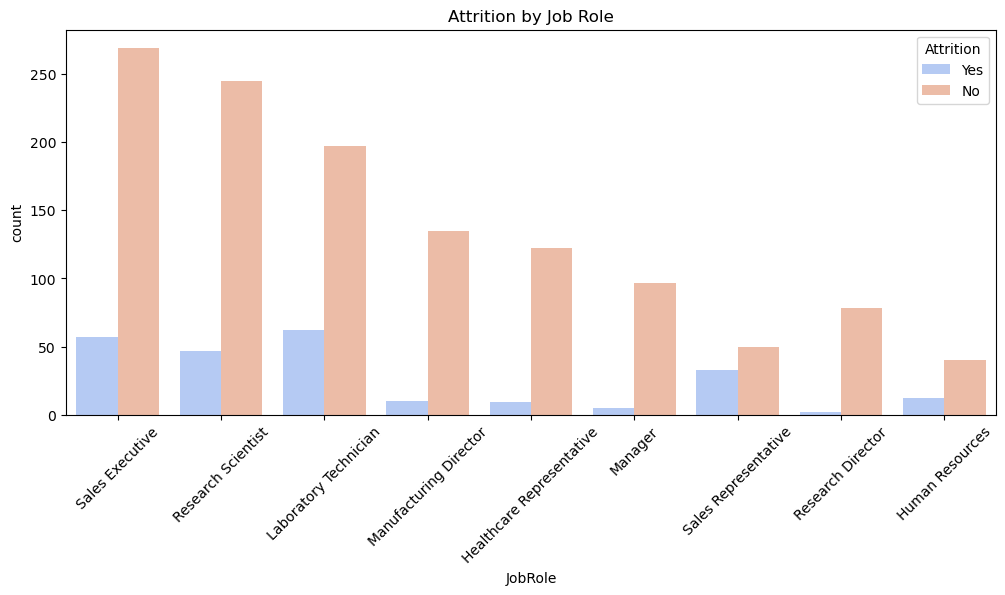

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='coolwarm')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()


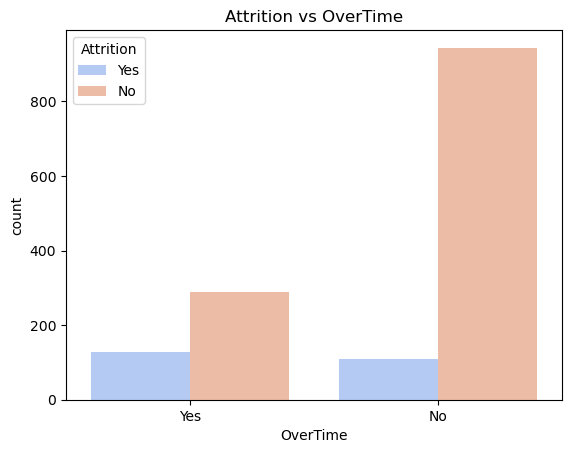

In [36]:
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='coolwarm')
plt.title("Attrition vs OverTime")
plt.show()


In [37]:
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [38]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)


In [41]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)


In [42]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


In [43]:
xgb_model = xgb.XGBClassifier(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


In [44]:
def evaluate_model(true, pred, name):
    print(f"\n================ {name} ================")
    print("Accuracy:", accuracy_score(true, pred))
    print("Classification Report:\n", classification_report(true, pred))
    print("Confusion Matrix:\n", confusion_matrix(true, pred))


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

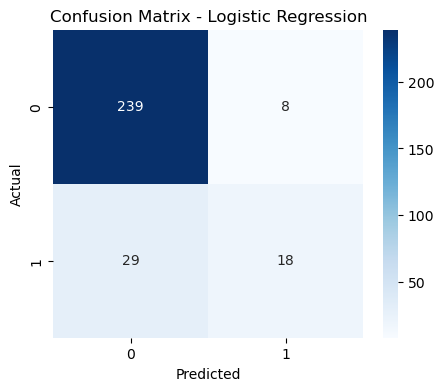


Accuracy - Logistic Regression: 0.8741

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294

------------------------------------------------------------


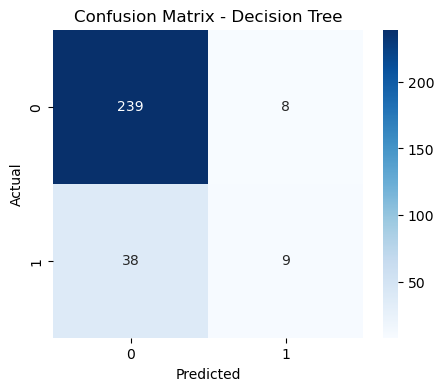


Accuracy - Decision Tree: 0.8435

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294

------------------------------------------------------------


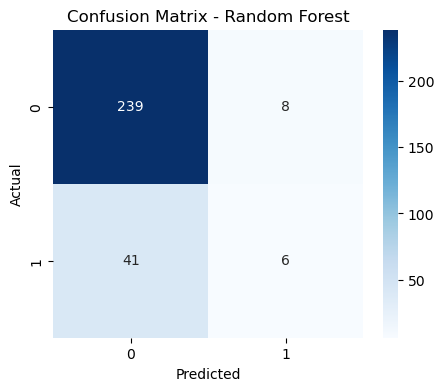


Accuracy - Random Forest: 0.8333

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.43      0.13      0.20        47

    accuracy                           0.83       294
   macro avg       0.64      0.55      0.55       294
weighted avg       0.79      0.83      0.79       294

------------------------------------------------------------


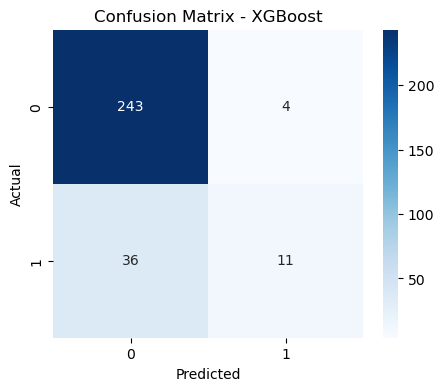


Accuracy - XGBoost: 0.8639

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.73      0.23      0.35        47

    accuracy                           0.86       294
   macro avg       0.80      0.61      0.64       294
weighted avg       0.85      0.86      0.83       294

------------------------------------------------------------


In [46]:
def evaluate_with_graph(y_true, y_pred, title):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Accuracy (separate)
    acc = accuracy_score(y_true, y_pred)
    print(f"\nAccuracy - {title}: {acc:.4f}")

    # Classification Report
    print(f"\nClassification Report - {title}")
    print(classification_report(y_true, y_pred))
    print("-" * 60)

# Evaluate all models
evaluate_with_graph(y_test, log_pred, "Logistic Regression")
evaluate_with_graph(y_test, dt_pred, "Decision Tree")
evaluate_with_graph(y_test, rf_pred, "Random Forest")
evaluate_with_graph(y_test, xgb_pred, "XGBoost")

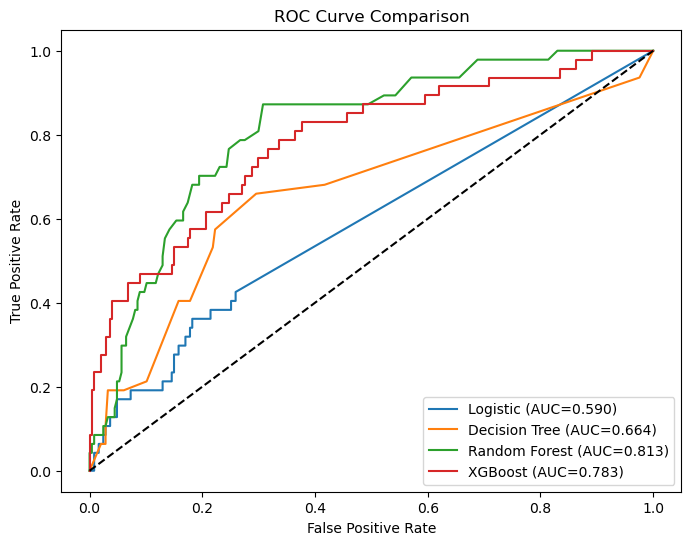

In [47]:
plt.figure(figsize=(8,6))

models = {
    "Logistic": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


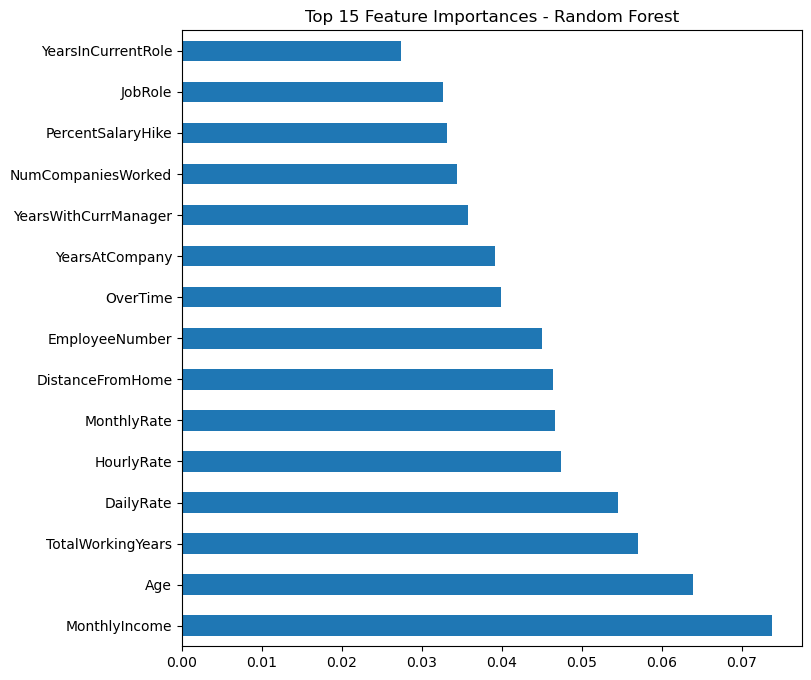

In [48]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,8))
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()


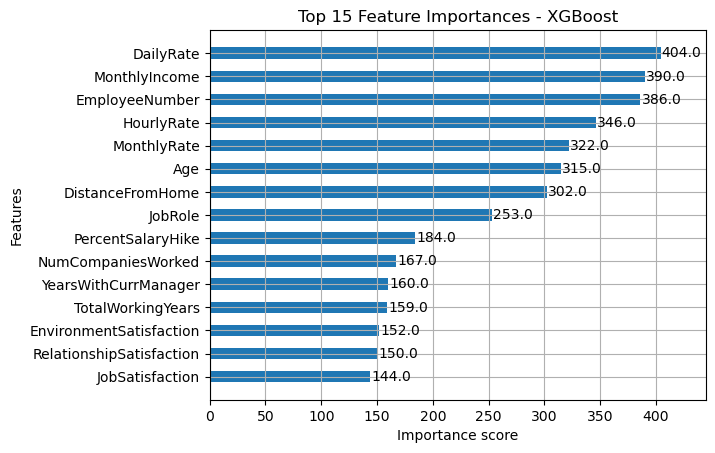

In [49]:
xgb.plot_importance(xgb_model, max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()


In [50]:
best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X, y) 

RandomForestClassifier(n_estimators=200, random_state=42)

In [51]:
import joblib

joblib.dump(rf_model, "model.pkl")   # or xgboost model
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [35]:
import os
os.getcwd()

'C:\\Users\\lenovo\\python learn\\Project py\\Full Cap Project\\project'

In [36]:
pip install streamlit joblib shap

  Using cached shap-0.50.0-cp312-cp312-win_amd64.whl.metadata (25 kB)
INFO: pip is looking at multiple versions of shap to determine which version is compatible with other requirements. This could take a while.
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/548.0 kB 1.7 MB/s eta 0:00:01
   -------------------------- ------------- 368.6/548.0 kB 4.6 MB/s eta 0:00:01
   ----------------------------- ---------- 399.4/548.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------------- ----- 471.0/548.0 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 548.0/548.0 kB 2.5 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [106]:
import streamlit
streamlit.__file__

'C:\\Users\\lenovo\\anaconda3\\Lib\\site-packages\\streamlit\\__init__.py'